In [1]:
# imported libs for scaling
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

#custom import
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount
0,LOS ANGELES,6037,4,2.0,3633,296425,2005,6941.39
1,LOS ANGELES,6037,3,4.0,1620,847770,2011,10244.94
2,LOS ANGELES,6037,3,2.0,2077,646760,1926,7924.68
3,LOS ANGELES,6037,0,0.0,1200,5328,1972,91.60
4,LOS ANGELES,6037,0,0.0,171,6920,1973,255.17
...,...,...,...,...,...,...,...,...
2140230,VENTURA,6111,2,1.0,812,566923,1951,6010.56
2140231,VENTURA,6111,4,2.0,1891,395704,1976,4628.30
2140232,VENTURA,6111,5,4.0,3611,1214890,2015,12785.44
2140233,VENTURA,6111,2,1.0,710,175319,1940,2040.78


In [4]:
df.fips.value_counts()

6037    1425207
6059     552057
6111     162971
Name: fips, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 0 to 2140234
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   county      object 
 1   fips        int64  
 2   bedrooms    int64  
 3   bathrooms   float64
 4   area        int64  
 5   tax_value   int64  
 6   year_built  int64  
 7   tax_amount  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 147.0+ MB


In [6]:
from prepare import train_val_test, visualize_compare, scale_data

In [7]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((1498164, 8), (321035, 8), (321036, 8))

In [8]:
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90


In [9]:
# define seed
seed = 42

# Filter data
train = train[(train['tax_value'] < 3_000_000) & (train['tax_amount'] < 3_000_000)]
val = val[(val['tax_value'] < 3_000_000) & (val['tax_amount'] < 3_000_000)]
test = test[(test['tax_value'] < 3_000_000) & (test['tax_amount'] < 3_000_000)]

# different scalers
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)

train, val, test = scale_data(train, val, test, mms)
train, val, test = scale_data(train, val, test, ss)
train, val, test = scale_data(train, val, test, rs)
train, val, test = scale_data(train, val, test, qt)            

In [13]:
train, val, test = scale_data(train, val, test, mms)
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039


In [15]:
train, val, test = scale_data(train, val, test, ss)
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,1.025875
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.609851
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,-0.349120
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,-0.835702
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,-0.889251


In [14]:
train, val, test = scale_data(train, val, test, rs)
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,1.414798
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.954642
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,-0.106057
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,-0.644256
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,-0.703485


In [16]:
train, val, test = scale_data(train, val, test, qt)   
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,1.229742
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.931824
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,-0.160889
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,-1.129932
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,-1.276232


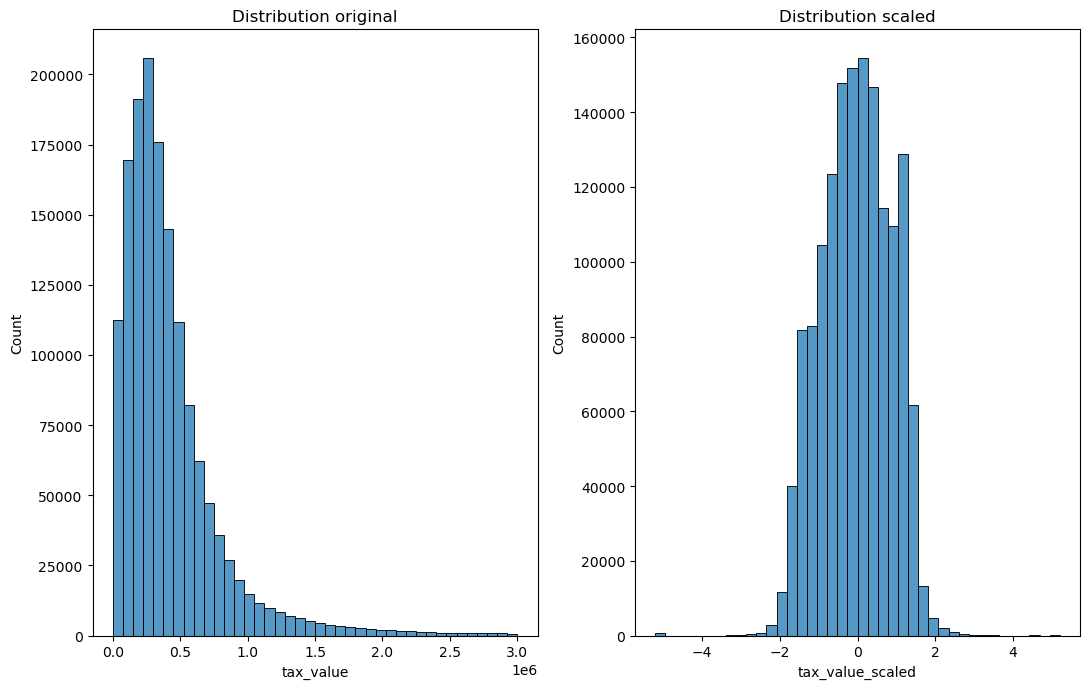

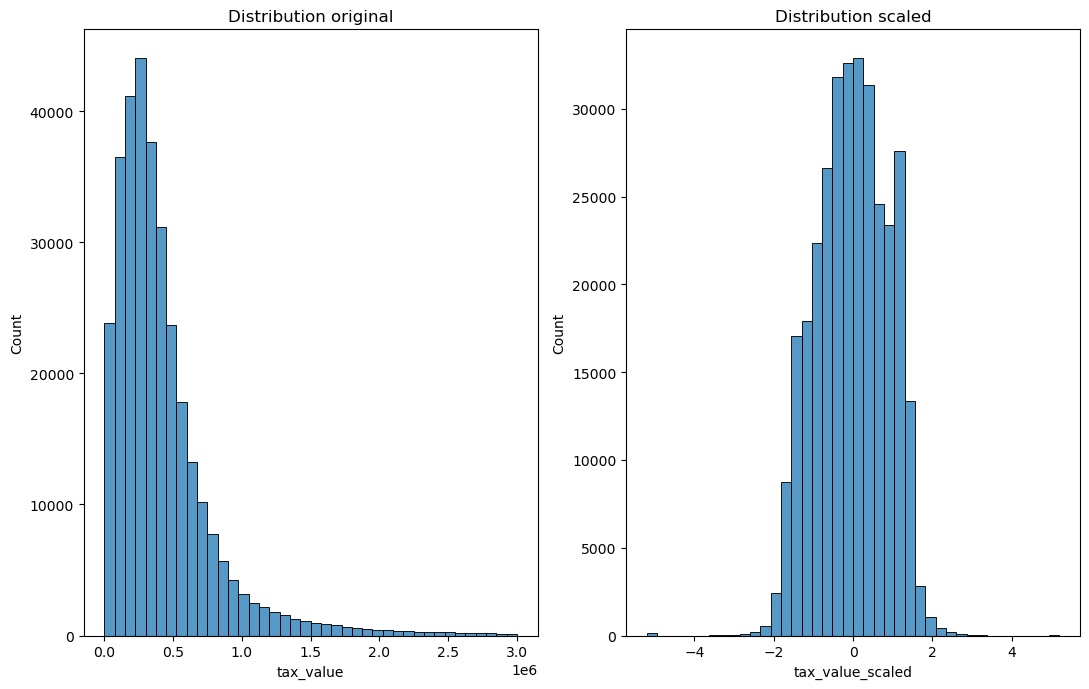

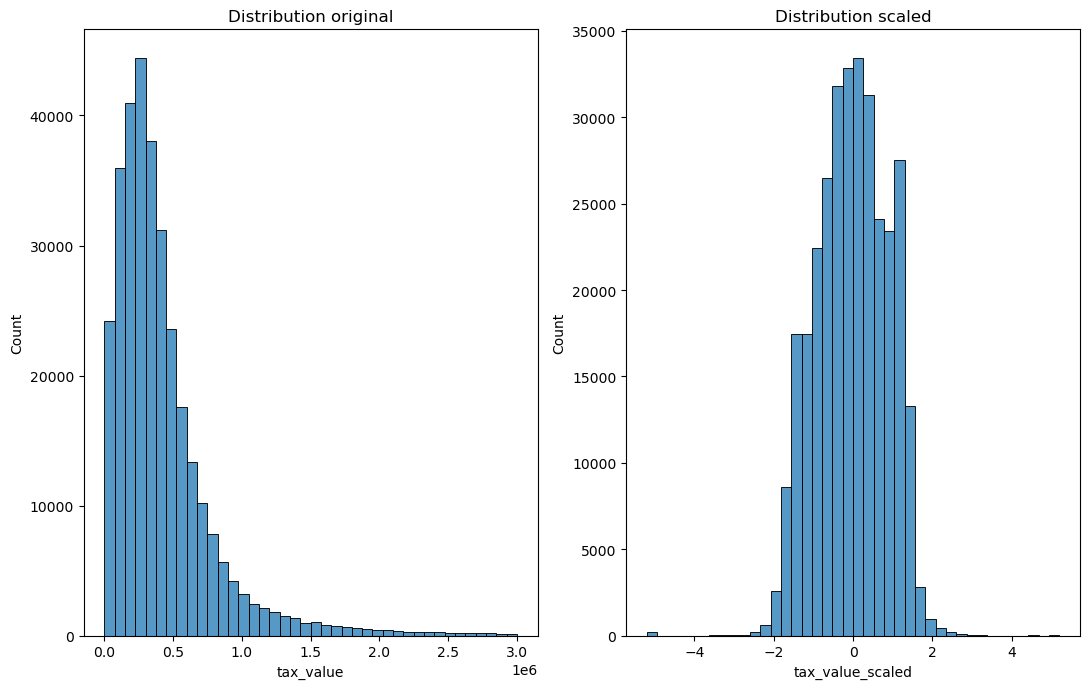

In [10]:
# Compare distributions for each scaled column
visualize_compare('tax_value_scaled', train)
visualize_compare('tax_value_scaled', val)
visualize_compare('tax_value_scaled', test)